<a href="https://colab.research.google.com/github/maggie20041027-svg/ECON3916-Statistical-Machine-Learning/blob/main/Lab%202/Lab_2_Deflating_History_with_FRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install the FRED API library
!pip install fredapi

In [5]:
# Install the FRED API library
!pip install fredapi

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='42636bb70ea4335cdcffbfbd82d831fe')

In [6]:
# 1. Fetch the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [7]:
def get_real_wage(nominal_col,cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


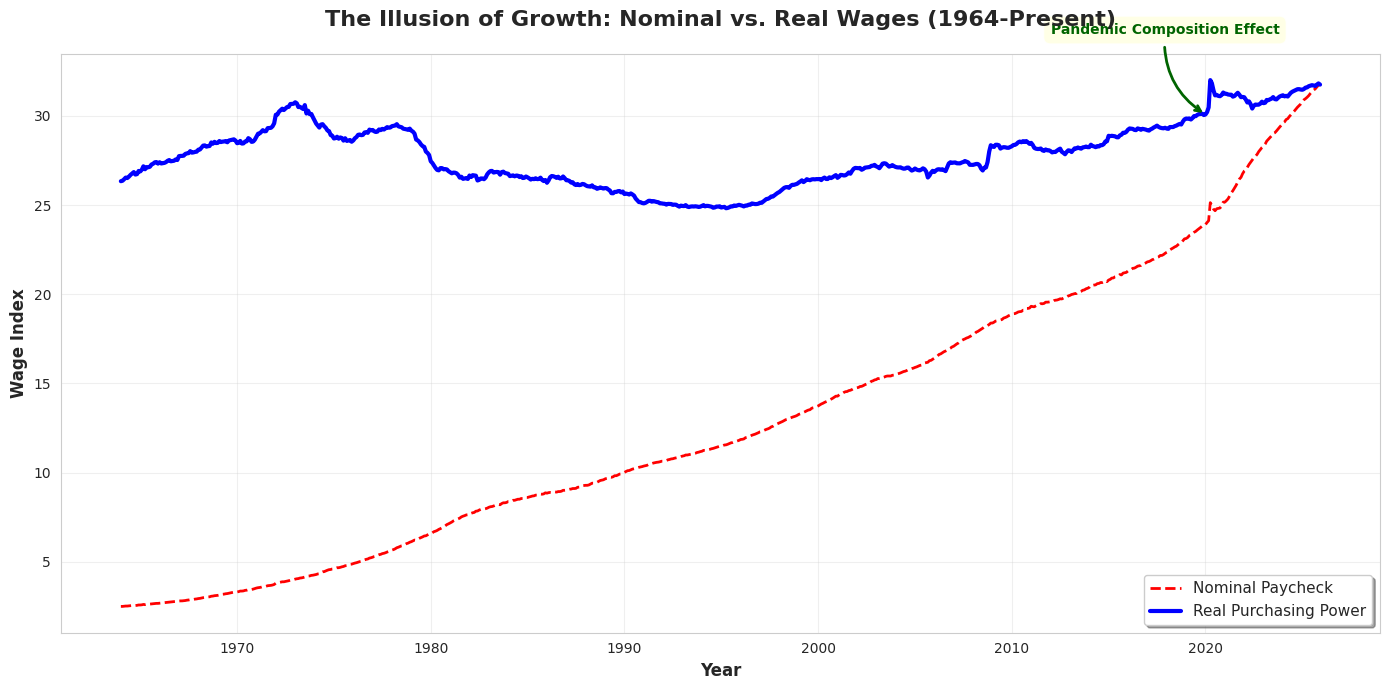

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the two wage series
ax.plot(df.index, df['Nominal_Wage'],
        linestyle='--',
        color='red',
        linewidth=2,
        label='Nominal Paycheck')

ax.plot(df.index, df['Real_Wage'],
        linestyle='-',
        color='blue',
        linewidth=3,
        label='Real Purchasing Power')

# Add title and labels
ax.set_title('The Illusion of Growth: Nominal vs. Real Wages (1964-Present)',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Wage Index', fontsize=12, fontweight='bold')

# Add legend
ax.legend(loc='best', fontsize=11, frameon=True, shadow=True)

# Add annotation for 2020 pandemic spike
# Find the 2020 data point for Real Wage
pandemic_year = pd.Timestamp('2020-01-01')
if pandemic_year in df.index:
    pandemic_value = df.loc[pandemic_year, 'Real_Wage']
else:
    # Find closest date to 2020
    idx_2020 = df.index.get_indexer([pandemic_year], method='nearest')[0]
    pandemic_date = df.index[idx_2020]
    pandemic_value = df.loc[pandemic_date, 'Real_Wage']
    pandemic_year = pandemic_date

ax.annotate('Pandemic Composition Effect',
            xy=(pandemic_year, pandemic_value),
            xytext=(pandemic_year - pd.DateOffset(years=8), pandemic_value + (pandemic_value * 0.15)),
            fontsize=10,
            fontweight='bold',
            color='darkgreen',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.8),
            arrowprops=dict(arrowstyle='->',
                          connectionstyle='arc3,rad=0.3',
                          color='darkgreen',
                          lw=2))

# Improve grid appearance
ax.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

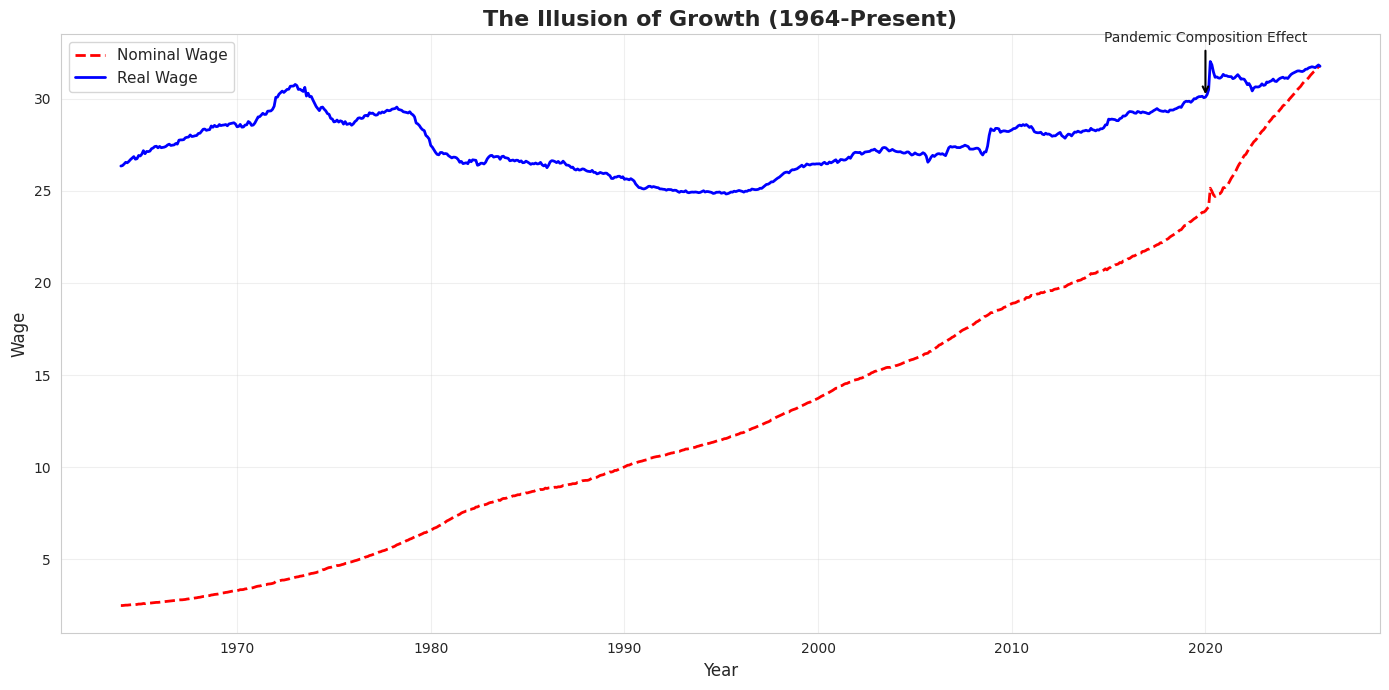

In [9]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the two wage series
ax.plot(df.index, df['Nominal_Wage'],
        linestyle='--',
        color='red',
        linewidth=2,
        label='Nominal Wage')

ax.plot(df.index, df['Real_Wage'],
        linestyle='-',
        color='blue',
        linewidth=2,
        label='Real Wage')

# Add title and labels
ax.set_title('The Illusion of Growth (1964-Present)',
             fontsize=16,
             fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Wage', fontsize=12)

# Add legend
ax.legend(loc='best', fontsize=11)

# Add annotation for 2020 pandemic spike
# Find the 2020 data point
try:
    # Try to find 2020 in the index
    mask_2020 = (df.index.year == 2020)
    if mask_2020.any():
        idx_2020 = df.index[mask_2020][0]
        real_wage_2020 = df.loc[idx_2020, 'Real_Wage']

        ax.annotate('Pandemic Composition Effect',
                    xy=(idx_2020, real_wage_2020),
                    xytext=(idx_2020, real_wage_2020 * 1.1),
                    fontsize=10,
                    ha='center',
                    arrowprops=dict(arrowstyle='->',
                                  color='black',
                                  lw=1.5))
except:
    pass

# Add grid for better readability
ax.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

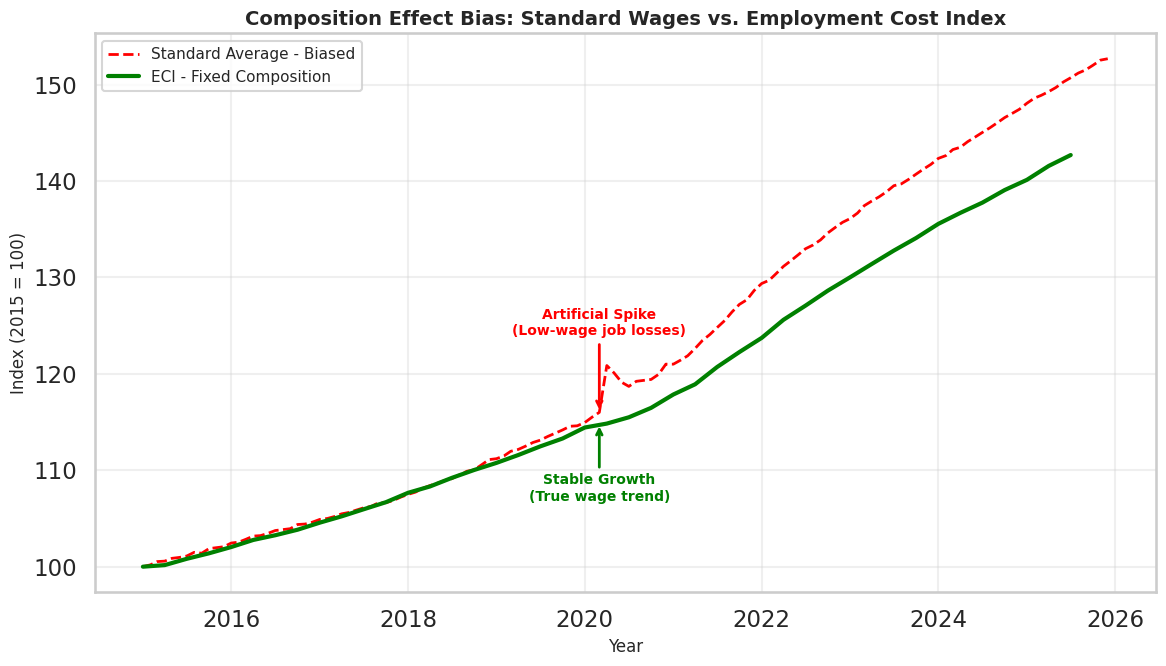

Summary of the Composition Effect:
Standard Wages - 2020 Peak: 152.69
ECI - 2020 Value: 114.44
Apparent Bias (difference): 38.26 points


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Fetch the Employment Cost Index (ECI) data
eci = fred.get_series('ECIWAG')

# 2. Filter both series to 2015 onwards
wages_filtered = wages[wages.index >= '2015-01-01']
eci_filtered = eci[eci.index >= '2015-01-01']

# 3. Rebase both series to 100 (using first value)
wages_rebased = (wages_filtered / wages_filtered.iloc[0]) * 100
eci_rebased = (eci_filtered / eci_filtered.iloc[0]) * 100

# 4. Create the comparison plot
plt.figure(figsize=(12, 7))

plt.plot(wages_rebased.index, wages_rebased,
         color='red', linestyle='--', linewidth=2,
         label='Standard Average - Biased')

plt.plot(eci_rebased.index, eci_rebased,
         color='green', linewidth=3,
         label='ECI - Fixed Composition')

# 5. Add annotations for the 2020 divergence
# Find approximate 2020 values for annotation
wages_2020_val = wages_rebased[wages_rebased.index >= '2020-03-01'].iloc[0]
eci_2020_val = eci_rebased[eci_rebased.index >= '2020-03-01'].iloc[0]
annotation_date = wages_rebased[wages_rebased.index >= '2020-03-01'].index[0]

# Annotate the artificial spike
plt.annotate('Artificial Spike\n(Low-wage job losses)',
             xy=(annotation_date, wages_2020_val),
             xytext=(annotation_date, wages_2020_val + 8),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, color='red', fontweight='bold',
             ha='center')

# Annotate the stable growth
plt.annotate('Stable Growth\n(True wage trend)',
             xy=(annotation_date, eci_2020_val),
             xytext=(annotation_date, eci_2020_val - 8),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=10, color='green', fontweight='bold',
             ha='center')

# Formatting
plt.title('Composition Effect Bias: Standard Wages vs. Employment Cost Index',
          fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Index (2015 = 100)', fontsize=12)
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary of the Composition Effect:")
print(f"Standard Wages - 2020 Peak: {wages_rebased.max():.2f}")
print(f"ECI - 2020 Value: {eci_rebased[eci_rebased.index >= '2020-01-01'].iloc[0]:.2f}")
print(f"Apparent Bias (difference): {wages_rebased.max() - eci_rebased[eci_rebased.index >= '2020-01-01'].iloc[0]:.2f} points")
